<a href="https://colab.research.google.com/github/govardhanmg/Open-AI-Group1/blob/main/LoadPredectionStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's continue from where we last left. In this lab, we will be cleaning our data to see how our models improve.

Let's quickly get our data, and repeat the steps we performed in the last lab.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
# read the data
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Loan_prediction.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
# look at the data
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# import seaborn as sns
# import statistics
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

In [51]:
data['Gender'].fillna(data['Gender'].mode() [0], inplace=True)
data['Married'].fillna(data['Married'].mode() [0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode() [0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode() [0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
#data['LoanAmount'].fillna(data['LoanAmount'].mode [0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode() [0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode() [0], inplace=True)


In [52]:
# # let's work with fewer columns for simplicity
# data = data.iloc[:,:11]
# data.columns
data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
data.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [54]:
data = pd.get_dummies (data,drop_first=True)

In [ ]:
data.head(30)

,<function get_dummies at 0x78c4b0240940>
0,True


In [55]:
x=data.drop(columns=['Loan_Status_Y'])



In [56]:
y = data['Loan_Status_Y']

In [57]:
data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True


In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=55)

In [61]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [62]:
y_predict=model.predict(X_test)

In [63]:
accurecy_pred=accuracy_score(y_test, y_predict)

This dataset doesn't have any null values, but let's go through the check and steps anyway.

<Axes: xlabel='Loan_Status_Y', ylabel='count'>

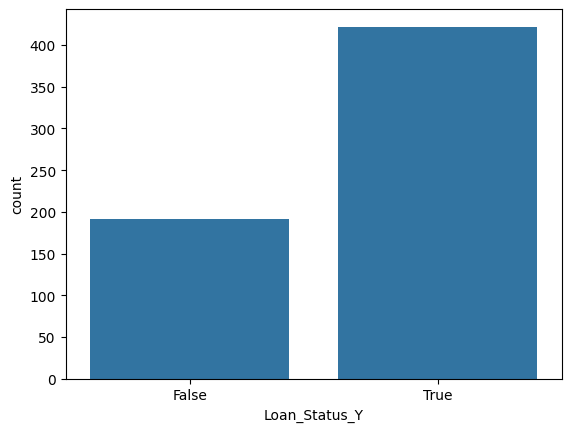

In [64]:
sns.countplot(x='Loan_Status_Y', data=data)

<Axes: xlabel='Loan_Status_Y', ylabel='Gender_Male'>

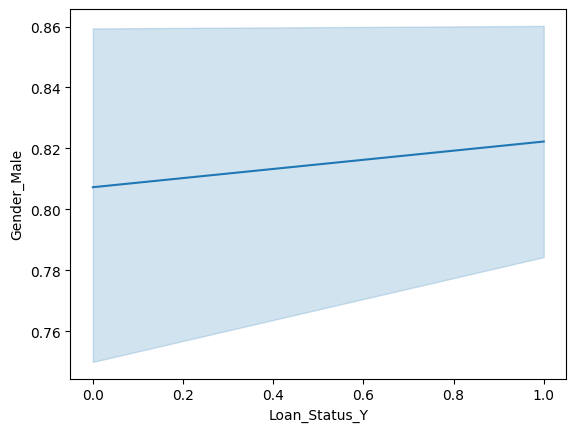

In [65]:
sns.lineplot(x=data['Loan_Status_Y'], y=data['Gender_Male'])

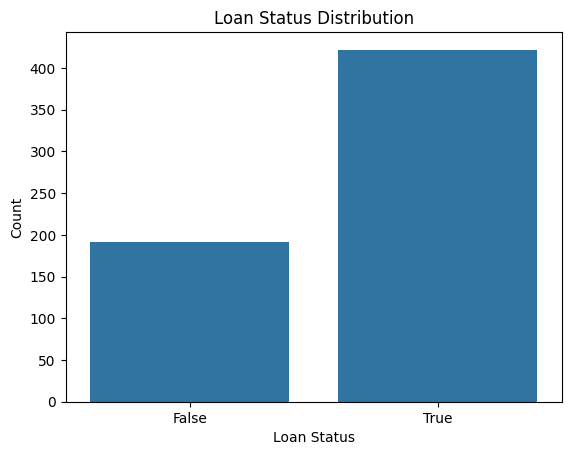

In [66]:
sns.countplot(x='Loan_Status_Y', data=data)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

<Axes: xlabel='Gender_Male'>

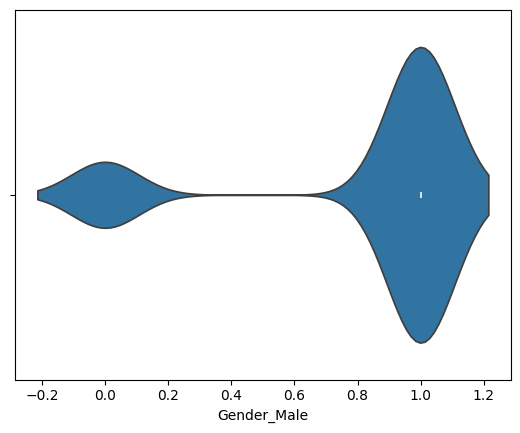

In [67]:
sns.violinplot(x=data['Gender_Male'])